<a href="https://colab.research.google.com/github/Mildredkulei7/Moringa_core_IP_2/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_06_Mildred_Kulei_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Statistics- Assessment

## 1. Defining the Question

### a) Specifying the Data Analytic Question

find out how we can predict which individuals are most likely to have or use a bank account

### b) Defining the Metric for Success

1. Have all required libraries installed.
2. Check the quality of data
3. the data should reflect a sample of the population.


### c) Understanding the context 

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. The solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### d) Recording the Experimental Design


1.Measure of central tendancy
2.variance
3.skewness
4.univariate analysis
5.bivariate analysis
6.multivariate analysis

### e) Data Relevance

The data is relevant has it has records of Age, gender, location, type of employemnt, if the respondent has bank account, level of education etc. which will be helpul in this research analysis.


## 2. Reading the Data

In [292]:
# Loading the Data from the source i.e. csv
# ---
# Dataset url = http://bit.ly/FinancialDataset 
# ---
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

financial_df= pd.read_csv('http://bit.ly/FinancialDataset ')
financial_df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [293]:
# Determining the no. of records in our dataset
#
financial_df.shape

(23524, 13)

There are 23,524 number of records.

In [294]:
# Previewing the top of our dataset
#
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [295]:
# Previewing the bottom of our dataset
#
financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [296]:
# Checking whether each column has an appropriate datatype
#
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [297]:
#checking the number of years present in the dataset.
financial_df.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

## 4. External Data Source Validation

### a.Validation

There are some few errors that will need to be acted upon like the years captured in the dataset, otherwise according to the external data source from Financal Sector Deepening(FSD), the dataset is valid.

## 5. Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


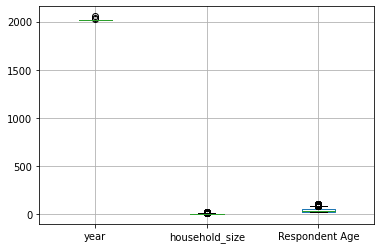

In [298]:
# Checking for Outliers
#
financial_df.boxplot()

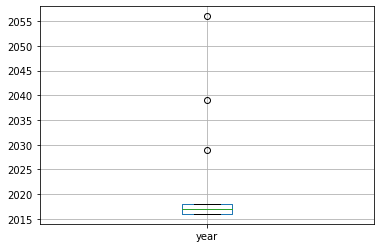

In [299]:
financial_df.boxplot(['year']);

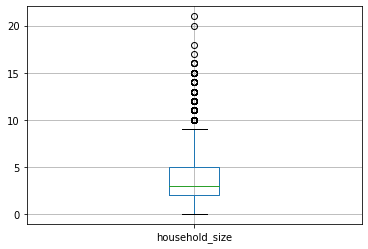

In [300]:
financial_df.boxplot(['household_size']);

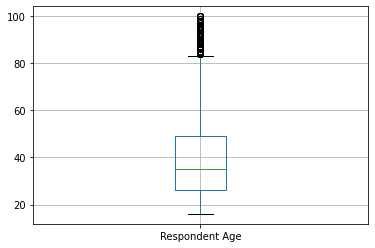

In [301]:
financial_df.boxplot(['Respondent Age']);

In [302]:
#removing outliers for Respondent age column
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  Lower_range= Q1-(1.5 * IQR)
  Upper_range= Q3+(1.5 * IQR)
  return Lower_range, Upper_range

In [303]:
lowscore,highscore =remove_outlier(financial_df['Respondent Age'])
financial_df['Respondent Age']=np.where(financial_df['Respondent Age']>highscore,highscore,financial_df['Respondent Age'])
financial_df['Respondent Age']=np.where(financial_df['Respondent Age']<lowscore,lowscore,financial_df['Respondent Age'])

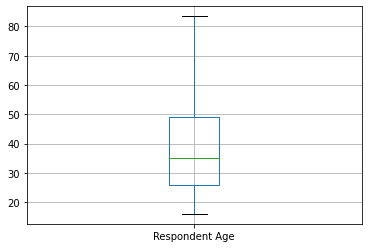

In [305]:
financial_df.boxplot(['Respondent Age']);
#outliers for respondent age colun removed.

In [209]:
#removing outliers in household size column
lowscore,highscore =remove_outlier(financial_df['household_size'])
financial_df['household_size']=np.where(financial_df['household_size']>highscore,highscore,financial_df['household_size'])
financial_df['household_size']=np.where(financial_df['household_size']<lowscore,lowscore,financial_df['household_size'])

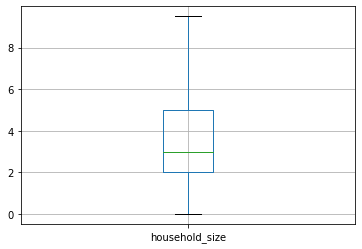

In [110]:
financial_df.boxplot(['household_size']);
#outliers for house hold size column removed

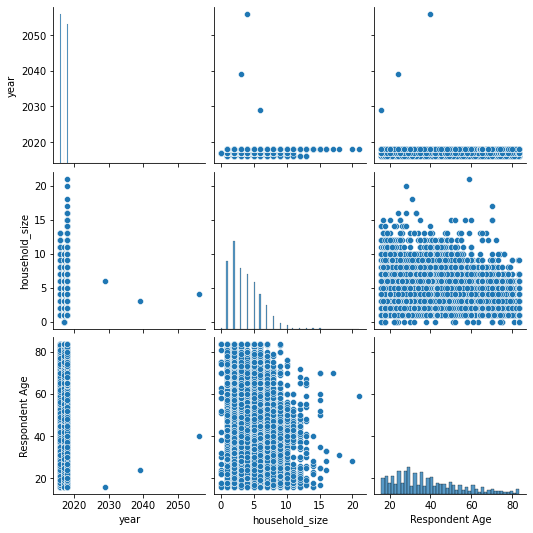

In [306]:
#checking for outliers using seaborn
sns.pairplot(financial_df)
plt.show()

In [307]:
# Checking for Anomalies
#
financial_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.751235
std,0.899669,2.279933,16.361919
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,83.500000


In [308]:
# Identifying the Missing Data
#
financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [309]:
# Dealing with the Missing Data
#
financial_df.dropna(inplace=True)
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [310]:
financial_df.isnull().sum()

#There are now no missing values.

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [312]:
financial_df.shape

#the rows have now reduced

(23343, 13)

In [311]:
# More data cleaning procedures
#changing the column name to lowercase

financial_df.columns = financial_df.columns.str.lower()
financial_df.head(2)

,country,year,uniqueid,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,the relathip with head,marital_status,level of educuation,type of job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [313]:
#replacing the white space in colun names with an underscore ('_')
financial_df.columns = financial_df.columns.str.replace(' ', '_')
financial_df.head(2)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [314]:
financial_df.year.unique()
#array([2018, 2029, 2056, 2016, 2039, 2017])

#notice that the are year values that are not valid; year 2029, 2056, 2039
#the rows containing the above years have to be dropped.

array([2018, 2029, 2056, 2016, 2039, 2017])

In [315]:
#dropping the rows containing the above years.

financial_df.drop(financial_df[financial_df.year.isin([2029, 2056, 2039])].index, inplace=True)

In [316]:
financial_df.shape

(23340, 13)

In [317]:
financial_df.year.value_counts()

2016    8683
2018    8157
2017    6500
Name: year, dtype: int64

In [318]:
financial_df.year.unique()
#now the invalid years have been removed.

array([2018, 2016, 2017])

In [319]:
#checking for duplicates
financial_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23340, dtype: bool

In [322]:
# convert the 'Year' column to datetime format
financial_df['year']= pd.to_datetime(financial_df['year'], format='%Y')

In [323]:
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 23340 non-null  object        
 1   year                    23340 non-null  datetime64[ns]
 2   uniqueid                23340 non-null  object        
 3   has_a_bank_account      23340 non-null  object        
 4   type_of_location        23340 non-null  object        
 5   cell_phone_access       23340 non-null  object        
 6   household_size          23340 non-null  float64       
 7   respondent_age          23340 non-null  float64       
 8   gender_of_respondent    23340 non-null  object        
 9   the_relathip_with_head  23340 non-null  object        
 10  marital_status          23340 non-null  object        
 11  level_of_educuation     23340 non-null  object        
 12  type_of_job             23340 non-null  object

## 6. Exploratory Analysis

### 1. Univariate Analysis

In [ ]:
# Ploting the summaries and recording our observations
#

In [125]:
#sumarry statistics
financial_df.describe()

,household_size,respondent_age
count,23340.000000,23340.000000
mean,3.662339,38.807069
std,2.194161,16.519905
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,9.500000,100.000000


In [249]:
#mode of household size
financial_df['household_size'].mode()

0    2.0
dtype: float64

In [250]:
#mode of respondent age
financial_df['respondent_age'].mode()

0    30.0
dtype: float64

In [243]:
financial_df['household_size'].var()

4.814340643236918

low variance show how mass of the points are centered around.

In [244]:
financial_df['respondent_age'].var()

267.73995532180834

The high variance shows us how scattered around the centre of mass the points are.

In [245]:
#skewness of household size
financial_df['household_size'].skew()

0.7000806709598625

In [246]:
#skewness of respondent age
financial_df['respondent_age'].skew()

0.7877414009911473

In [248]:
#kurtosis of household size
financial_df['household_size'].kurt()

-0.283136693204888

since the kurtosis is close to 0, then a normal distribution is often assumed.

In [247]:
#kurtosis of household size
financial_df['respondent_age'].kurt()

-0.12164660784316927

since the kurtosis is close to 0, then a normal distribution is often assumed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


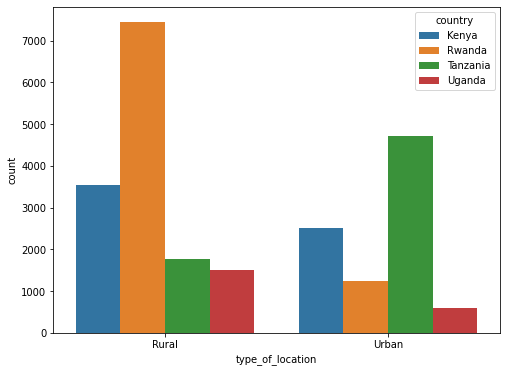

In [168]:
plt.figure(figsize=(8,6))
sns.countplot(financial_df.type_of_location, hue=financial_df.country)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


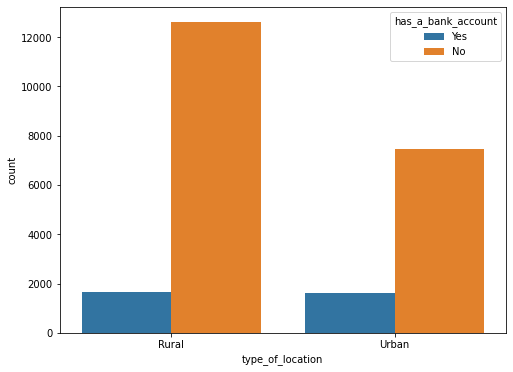

In [279]:
plt.figure(figsize=(8,6))
sns.countplot(financial_df.type_of_location, hue=financial_df.has_a_bank_account)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


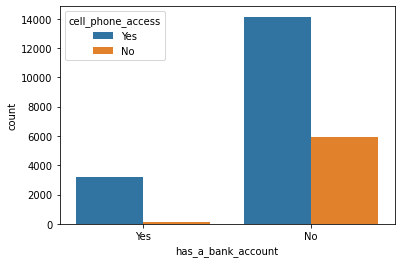

In [280]:

sns.countplot(financial_df.has_a_bank_account, hue=financial_df.cell_phone_access)
plt.show();


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


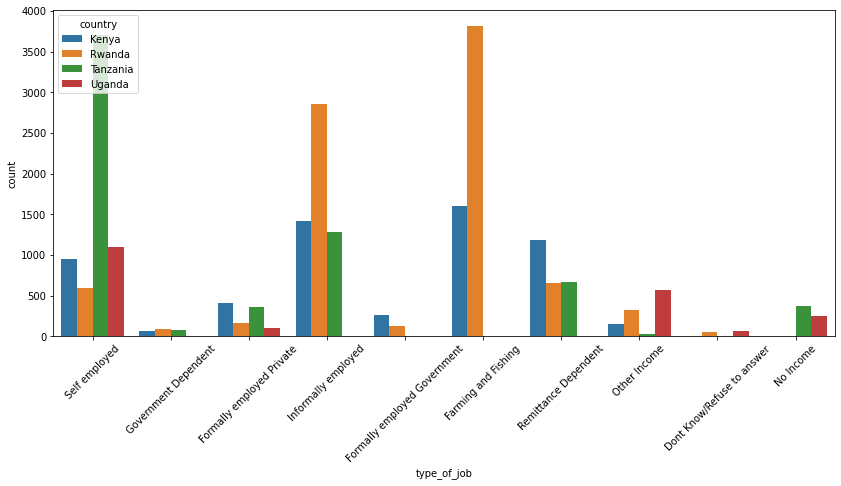

In [271]:

plt.figure(figsize=(14,6))
plt.xticks(rotation = 45)
sns.countplot(financial_df.type_of_job, hue=financial_df.country)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


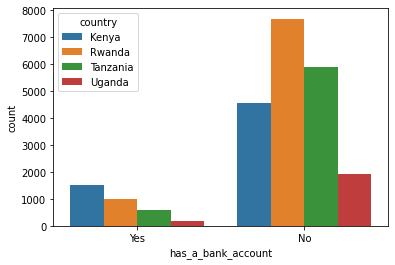

In [153]:
sns.countplot(financial_df.has_a_bank_account, hue=financial_df.country)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


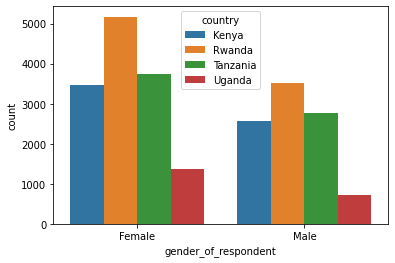

In [152]:

sns.countplot(financial_df.gender_of_respondent, hue=financial_df.country)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


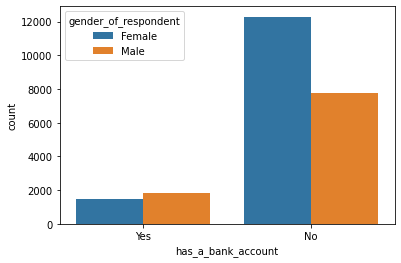

In [170]:
sns.countplot(financial_df.has_a_bank_account, hue=financial_df.gender_of_respondent)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


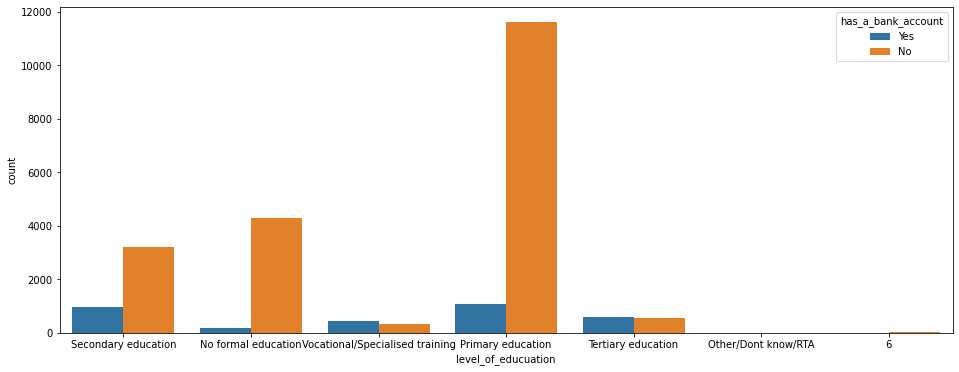

In [177]:
plt.figure(figsize=(16,6))
sns.countplot(financial_df.level_of_educuation, hue=financial_df.has_a_bank_account)
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


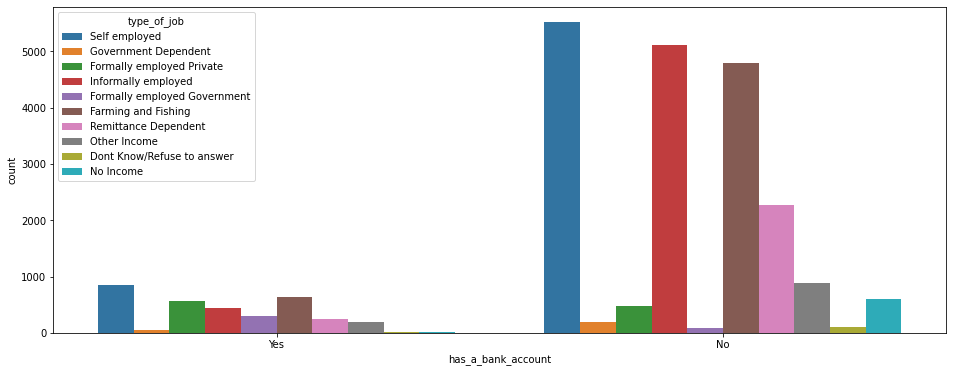

In [180]:
plt.figure(figsize=(16,6))
sns.countplot(financial_df.has_a_bank_account, hue=financial_df.type_of_job)
plt.show();

### 2. Bivariate Analysis

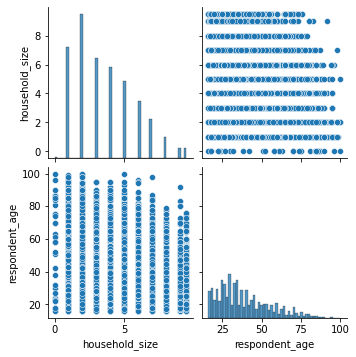

In [181]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(financial_df)
plt.show()

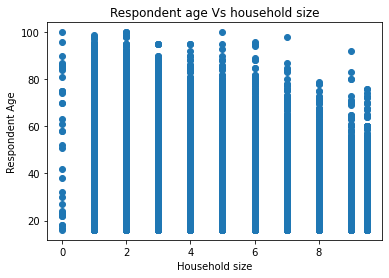

In [189]:
# Plotting a scatterplot

plt.scatter(financial_df['household_size'], financial_df['respondent_age'])

# Giving our scatterplot a title
plt.title('Respondent age Vs household size')

# Labelling our x axis
plt.xlabel('Household size')

# Labelling our y axis
plt.ylabel('Respondent Age')

# Displaying our scatterplot
plt.show()

In [190]:
# Calculating the pearson coefficient
pearson_coeff = financial_df['household_size'].corr(financial_df['respondent_age'], method="pearson") 
print(pearson_coeff)

-0.12191002095718263


This shows that there is a strong negative Correlation coefficient between household size and age of the respondent. which indicates that the variables move in different directions.

In [228]:
financial_df.head(2)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent


In [251]:
financial_df.type_of_job.value_counts()

Self employed                   6361
Informally employed             5549
Farming and Fishing             5422
Remittance Dependent            2508
Other Income                    1077
Formally employed Private       1047
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: type_of_job, dtype: int64

In [258]:
job_type= financial_df.groupby(['type_of_job'], as_index=False)['respondent_age'].mean().sort_values(by='respondent_age',ascending=False)
job_type

,type_of_job,respondent_age
4,Government Dependent,65.425101
1,Farming and Fishing,43.393582
9,Self employed,38.781088
2,Formally employed Government,38.093264
0,Dont Know/Refuse to answer,37.896000
7,Other Income,37.668988
5,Informally employed,36.166426
8,Remittance Dependent,35.825359
3,Formally employed Private,34.067813
6,No Income,32.656958


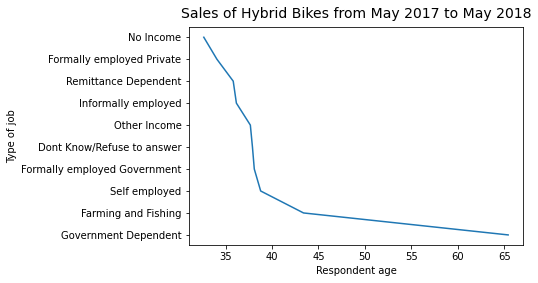

In [266]:
# Plotting a line graph
job= job_type['type_of_job']
respondent = job_type['respondent_age']

plt.plot(respondent, job)
# Giving a title to our line graph
plt.title("Sales of Hybrid Bikes from May 2017 to May 2018", fontsize=14, y=1.015)

# Labelling the y-axis
plt.ylabel('Type of job')

# Labelling the x-axis
plt.xlabel('Respondent age')

# Displaying our graph
plt.show()

### 3. Multivariate Analysis

In [273]:
financial_df.head(3)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed


In [276]:
# Data Reduction
#
#The first preprocessing step is to divide the dataset into a feature set and corresponding labels

X = financial_df.drop('country', 1)
y = financial_df['country']

In [277]:
#The next preprocessing step is to divide data into training and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [281]:
#We will perform standard scalar normalization to normalize our feature set
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

TypeError: ignored

In [288]:
#Adequacy Test
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(financial_df)
chi_square_value, p_value

(344.6755348364735, 1.3108883267490492e-35)

In [324]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(financial_df)

ValueError: ignored

In [330]:
import matplotlib.dates as mpl_dates
financial_df.reset_index(inplace=True)
financial_df['year']=financial_df['year'].apply(mpl_dates.date2num)
#financial_df = financial_df.astype(float)

AttributeError: ignored

In [332]:
#Choosing the Number of Factors
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(financial_df, 13, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev


ValueError: ignored

In [333]:
plt.scatter(range(1,financial_df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

NameError: ignored

## 7. Implementing the Solution

From the analysis we can see that the high percent of people who have the bank account also have access to cell phone, are also well educated and have source of income.

So we can predict which individual is likely to have or use bank account in regards to their ability to access a cell phone, if they have some source of income and are well educated to enable them do banktransactions.


## 8. Challenging the solution

## 9. Follow up questions

### a). Did we have the right data?

yes

### b). Do we need other data to answer our question?

Yes, we need other data to help us analyse our research, we need data about other form of saving the people where using other than Bank, to help us understand the low interest in bank accounts.

### c). Did we have the right question?

yes